# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import datetime as dt
import matplotlib.ticker as mtick

In [2]:
plot_output_dir = "\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Output Plots"
data_output_dir = "\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Output Data"

In [3]:
excel_path = "\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Manual\\input-data.xlsx"
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

##Users\Advait Lath\Documents\nimf-tracker-main\Manual

Files in 'c:\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Manual': ['.DS_Store', 'COW', 'input-data.xlsx', 'input-data1.xlsx', 'manual.ipynb', 'oag2019.png', 'snapshot_graphs.xlsx', '~$input-data.xlsx']


# GST and eWay

In [4]:
gst = pd.read_excel(excel_path, sheet_name='gst-eway', index_col=0, parse_dates=True)

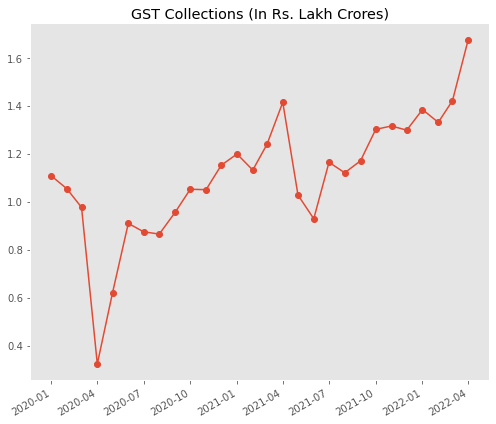

In [5]:
(gst['GST']/1000000).plot(marker='o', figsize=(7,6), x_compat=True)

plt.title("GST Collections (In Rs. Lakh Crores)")

#plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("")
plt.tight_layout()
plt.grid(visible=False)

plt.savefig(plot_output_dir+"\\gst.png", dpi=300)


In [6]:
gst = gst/1000000

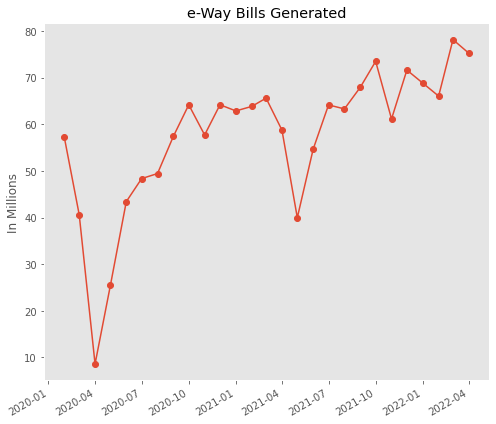

In [7]:
gst[gst.columns[0]].plot(kind='line', marker='o', figsize=(7,6), x_compat=True)
plt.title('e-Way Bills Generated', color='black')
plt.ylabel('In Millions')
# plt.xlabel('Data as on 6 Sep, 2020')
plt.grid(visible=False)
plt.tight_layout()

plt.savefig(plot_output_dir+'\\e-way bills', dpi=150, bbox_inches='tight')


In [8]:
gst.to_csv(data_output_dir+"\\gst_eway.csv")

# Truck

In [9]:
truck = pd.read_excel(excel_path, sheet_name="truck",index_col=0, parse_dates=True)

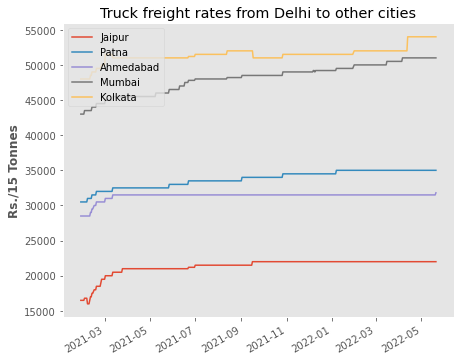

In [10]:
truck['Jaipur'].plot(label='Jaipur')
truck['Patna '].plot(label='Patna')
truck['Ahmedabad '].plot(label='Ahmedabad')
truck['Mumbai '].plot(label='Mumbai')
# truck['Chennai '].plot(label='Chennai')
truck['Kolkata '].plot(label='Kolkata', figsize=(7,6))
plt.legend(loc='upper left')
plt.grid(visible=False)
plt.title('Truck freight rates from Delhi to other cities')
plt.xlabel('')
plt.ylabel('Rs./15 Tonnes', fontweight= 'bold')

plt.savefig(plot_output_dir+'\\truck.png', dpi=300, bbox_inches='tight')



# Energy Consumption

In [11]:
elec = pd.read_excel(excel_path, sheet_name="electricity",index_col=0, parse_dates=True)

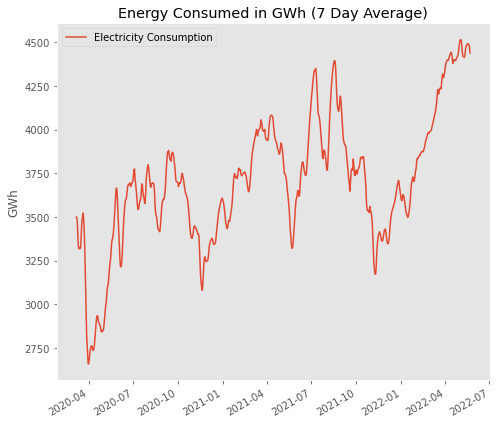

In [12]:
elec['2020-03-01':].rolling(7).mean().plot(figsize=(7,6), x_compat=True)

plt.xlabel('')
plt.ylabel('GWh')
# plt.grid(b=True, linewidth=0.4)
plt.title('Energy Consumed in GWh (7 Day Average)')
plt.legend()
plt.grid(visible=False)
plt.tight_layout()

plt.savefig(plot_output_dir+'\\elec.png', dpi=300)


# UPI

In [13]:
upi = pd.read_excel(excel_path, sheet_name="upi",index_col=0, parse_dates=True)

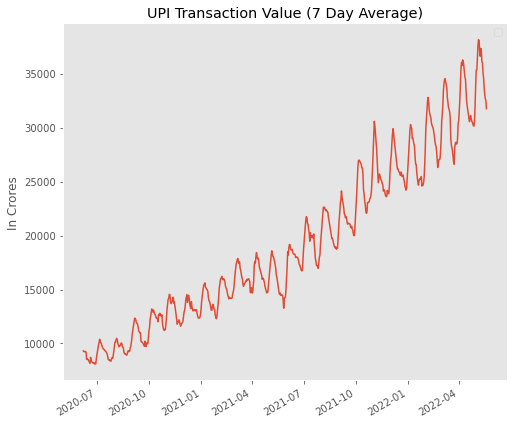

In [15]:
upi.rolling(7).mean().plot(figsize=(7,6), x_compat=True)

plt.title("UPI Transaction Value (7 Day Average)")
plt.legend("")
plt.xlabel("")

plt.tight_layout()

plt.ylabel('In Crores')

plt.grid(visible=False)

plt.savefig(plot_output_dir+'\\upi_val.png', dpi=150, bbox_inches='tight')


# Unemployment

## Daily

In [16]:
unemp_daily = pd.read_excel(excel_path, sheet_name="unemp-daily",index_col=0, parse_dates=True)

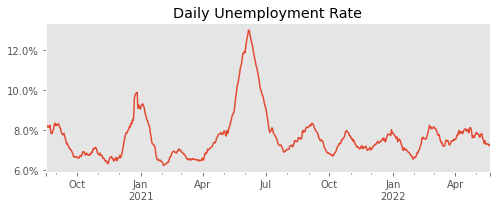

In [17]:
# ax=unemp_daily.plot(secondary_y='Labour   participation rate  (LPR) ')

ax = unemp_daily['UER'].plot(figsize=(7,3), kind='line')

plt.xlabel("")
plt.title('Daily Unemployment Rate')

plt.grid(visible=False)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()

plt.savefig(plot_output_dir+'\\unemp.png', dpi=300, bbox_inches='tight')


## Weekly

In [18]:
unemp_weekly = pd.read_excel(excel_path, sheet_name="unemp-weekly",index_col=0, parse_dates=True)

In [19]:
unemp_weekly = unemp_weekly['2020-11-26':].loc[:,['All India', 'LFPR']]

C:\Users\ADVAIT~1\AppData\Local\Temp/ipykernel_5136/2232539766.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  unemp_weekly = unemp_weekly['2020-11-26':].loc[:,['All India', 'LFPR']]


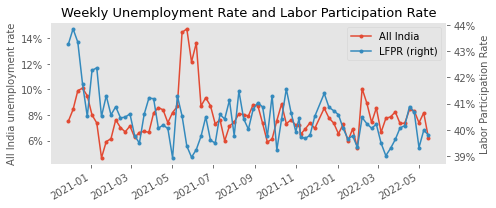

In [20]:
ax = unemp_weekly.plot(figsize=(7,3), x_compat=True, secondary_y=['LFPR'], marker='.')

ax.set_xlabel("")
plt.title('Weekly Unemployment Rate and Labor Participation Rate', fontsize=13)

plt.grid(visible=False)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.right_ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax.set_ylabel("All India unemployment rate", fontsize=10)
ax.right_ax.set_ylabel("Labor Participation Rate", fontsize=10)

plt.tight_layout()
plt.savefig(plot_output_dir+'\\weekly_unemp.png', dpi=300, bbox_inches='tight')


# OAG Flight

## 2019

In [21]:
oag2019 = pd.read_excel(excel_path, sheet_name='oag_2019', index_col=0, parse_dates=True)

In [22]:
oag2019 = oag2019*100

In [23]:
oag2019.iloc[4]

Domestic         16.2
International   -15.3
Total             7.5
Name: South Asia, dtype: float64

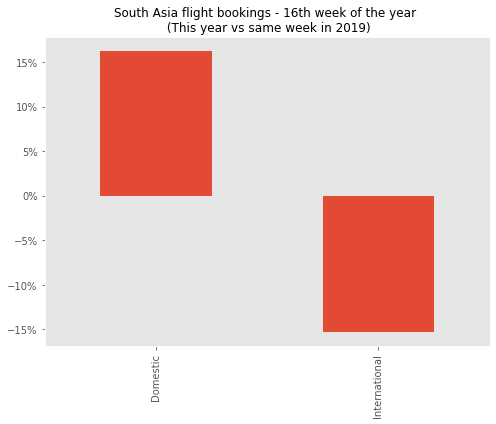

In [24]:
ax = oag2019.iloc[4,[0,1]].plot(kind='bar', figsize=(7,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

# plt.title("South Asia flight bookings - this week vs same week in 2019")
plt.title("South Asia flight bookings - 16th week of the year \n (This year vs same week in 2019)", fontsize=12)

plt.grid(False)

plt.tight_layout()

plt.savefig(plot_output_dir+'\\oag_2019.png', dpi=300, bbox_inches='tight')

## Flight Footfall (CEIC)

In [24]:
foot_fall = pd.read_excel(excel_path, sheet_name='footfall', index_col=0, parse_dates=True)

In [25]:
foot_fall= foot_fall/100000
foot_fall_7d= foot_fall.rolling(7).mean().dropna()
foot_fall_7d.tail()

,Daily Passenger Footfall
Date,
2022-05-17,7.463104
2022-05-18,7.529600
2022-05-19,7.543151
2022-05-20,7.551530
2022-05-21,7.558686


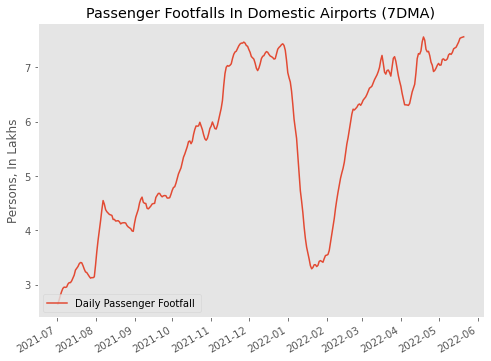

In [26]:
foot_fall_7d.plot(figsize=(8,6), x_compat=True)


plt.xlabel('')
plt.ylabel('Persons, In Lakhs')
# plt.ylabel('YoY Change in %')
plt.title('Passenger Footfalls In Domestic Airports (7DMA)')
plt.grid(visible=False)
# plt.show()
plt.legend(loc='lower left')
plt.savefig(plot_output_dir+'\\DailyFootfalls.png', dpi=500, bbox_inches='tight')

# Flight Movements (CEIC)(INT'L and DOMESTIC)

In [27]:
flight_mvmt = pd.read_excel(excel_path, sheet_name='flightmovements', index_col=0, parse_dates=True)

In [28]:
flight_mvmt_7d= flight_mvmt.rolling(7).mean().dropna()
#flight_mvmt_7d_df = pd.DataFrame([['Domestic Flight Movements', 'International Flight Movements']], columns=['Domestic Flight Movements','International Flight Movements'])
flight_mvmt_7d.head()

,Domestic Flight Movements,International Flight Movements
Date,,
2021-07-19,3116.142857,253.857143
2021-07-20,3169.142857,255.571429
2021-07-21,3225.000000,257.857143
2021-07-22,3251.000000,251.857143
2021-07-23,3265.000000,242.285714


In [25]:
# ax = flight_mvmt_7d_df['Domestic Flight Movements','International Flight Movements'].plot(figsize=(8,6), x_compat=True, secondary_y=True)
# #ax2= flight_mvmt_7d['Domestic Flight Movements'].plot(figsize=(8,6), x_compat=True)

# ax2 = ax.twinx()
# ax.plot(color = 'g')
# ax2.plot(color = 'b')

# plt.xlabel('Movements= Arrival Flights+ Departure Flights', labelpad=10)


# ax.set_ylabel('Domestic Flights')
# ax2.set_ylabel('International Flights')
# # plt.ylabel('YoY Change in %')
# plt.title('Flight Movements, India (7DMA)')
# plt.grid(visible=False)
# # plt.show()
# plt.legend(loc='right')
# plt.savefig(plot_output_dir+'\\flightmovements.png', dpi=500, bbox_inches='tight')

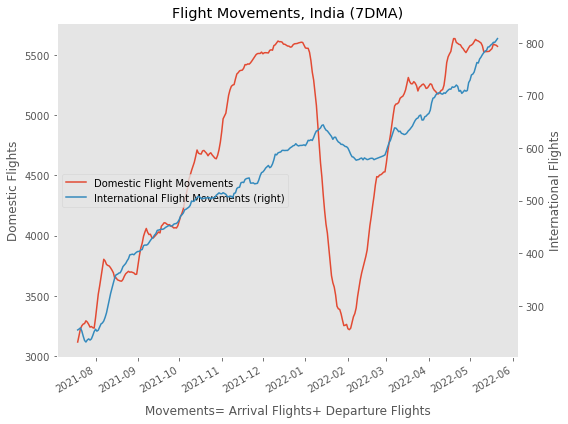

In [29]:
ax=flight_mvmt_7d.plot(kind='line', y='Domestic Flight Movements', figsize=(8,6), x_compat=True)

ax2=flight_mvmt_7d.plot(kind='line', y='International Flight Movements', secondary_y=True, ax=ax, x_compat=True)

ax.set_ylabel('Domestic Flights')
ax2.set_ylabel('International Flights')
ax.set_xlabel('Movements= Arrival Flights+ Departure Flights', labelpad=10)
plt.title('Flight Movements, India (7DMA)')

plt.grid(visible=False)
#plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig(plot_output_dir+'\\flightmovements.png', dpi=500, bbox_inches='tight')

plt.show()

# Consumer Sentiment

In [30]:
sent = pd.read_excel(excel_path, sheet_name="sentiment",index_col=0, parse_dates=True, header=1)

In [31]:
sent.rename(columns={"Consumer Sentiment Indices (CMIE-Umich)": "Date"}, inplace=True)
sent.columns = (['Index of Consumer Sentiments-All India ', 'Index of Consumer Sentiments-Urban ',
       'Index of Consumer Sentiments-Rural ', 'Index of Consumer Expectations-All India ',
       'Index of Consumer Expectations-Urban ', 'Index of Consumer Expectations-Rural ',
       'Index of Current Economic Conditions-All India ',
       'Index of Current Economic Conditions-Urban ',
       'Index of Current Economic Conditions-Rural '])

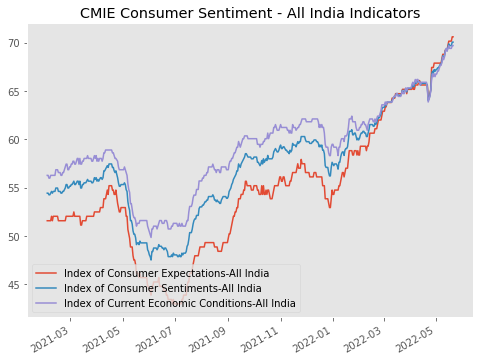

In [32]:
#All India plots
sent['Index of Consumer Expectations-All India '].plot(label='Index of Consumer Expectations-All India ')
sent['Index of Consumer Sentiments-All India '].plot(label='Index of Consumer Sentiments-All India')
sent['Index of Current Economic Conditions-All India '].plot(label='Index of Current Economic Conditions-All India', figsize=(8,6))

plt.xlabel('')
# plt.ylabel('YoY Change in %')
plt.title('CMIE Consumer Sentiment - All India Indicators')
plt.grid(visible=False)
# plt.show()
plt.legend(loc='lower left')
plt.savefig(plot_output_dir+'\\All India Indicators.png', dpi=200, bbox_inches='tight')



In [33]:
sent.tail()

,Index of Consumer Sentiments-All India,Index of Consumer Sentiments-Urban,Index of Consumer Sentiments-Rural,Index of Consumer Expectations-All India,Index of Consumer Expectations-Urban,Index of Consumer Expectations-Rural,Index of Current Economic Conditions-All India,Index of Current Economic Conditions-Urban,Index of Current Economic Conditions-Rural
,,,,,,,,,
2022-05-17,69.68,65.00,72.26,70.14,64.85,72.77,69.39,65.10,71.94
2022-05-18,69.68,65.17,71.72,70.14,65.27,72.30,69.39,65.10,71.34
2022-05-19,69.68,65.33,71.90,70.14,65.69,72.30,69.39,65.10,71.64
2022-05-20,70.04,65.33,71.90,70.59,65.69,72.30,69.68,65.10,71.64
2022-05-21,70.04,65.50,71.72,70.59,65.69,72.30,69.68,65.37,71.34


# PMI

In [34]:
pmi = pd.read_excel(excel_path, sheet_name="pmi",index_col=0, parse_dates=True)

In [35]:
pmi

,IHS Markit India manufacturing PMI,IHS Markit India services PMI,IHS Markit India composite PMI
Month,,,
2015-10-01,50.7,53.2,NaN
2015-11-01,50.3,50.1,NaN
2015-12-01,49.1,53.6,NaN
2016-01-01,51.1,54.3,NaN
2016-02-01,51.1,51.4,NaN
...,...,...,...
2021-12-01,55.5,55.5,56.4
2022-01-01,54.0,51.5,53.0
2022-02-01,54.9,51.8,53.5


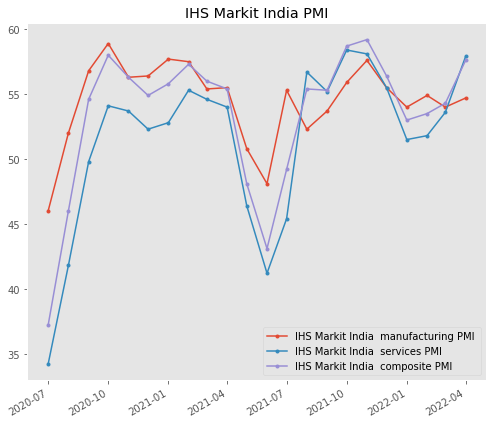

In [36]:
pmi.iloc[57:].plot(marker='.', figsize=(7,6), x_compat=True)
plt.xlabel("")
plt.title('IHS Markit India PMI')
plt.tight_layout()
plt.grid(visible=False)

plt.savefig(plot_output_dir+'\\pmi.png', dpi=150)

plt.show()

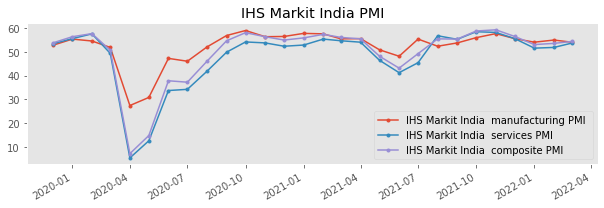

In [37]:
pmi.iloc[50:].plot(marker='.', figsize=(8.5,3), x_compat=True)
plt.xlabel("")
plt.title('IHS Markit India PMI')
plt.tight_layout()
plt.grid(visible=False)

plt.savefig(plot_output_dir+'\\pmicow.png', dpi=150)

plt.show()

# Vehicles

In [43]:
vehicle = pd.read_excel(excel_path, sheet_name="vehicles",index_col=0, parse_dates=True)

In [44]:
vehicle.rename(columns={
    "Transportation  vehicles ": "Commercial Vehicles",
    "Non-transportation  vehicles ": "Passenger Vehicles"
}, inplace=True)

In [45]:
vehicle = vehicle.iloc[-30:]
vehicle.index = pd.to_datetime(vehicle.index).to_period('M')

In [46]:
vehicle = vehicle/100000

In [47]:
vehicle.tail()

,Total vehicles,Commercial Vehicles,Passenger Vehicles
2021-12,15.66984,1.15272,14.51712
2022-01,14.44456,1.18849,13.25607
2022-02,13.80570,1.12681,12.67889
2022-03,16.28490,1.39037,14.89453
2022-04,16.35382,1.32521,15.02861


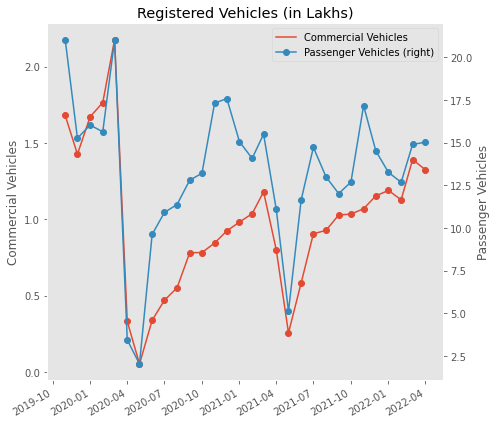

In [48]:
ax=vehicle.plot(kind='line', y='Commercial Vehicles', figsize=(7,6), marker='o', x_compat=True)

ax2=vehicle.plot(kind='line', y='Passenger Vehicles', secondary_y=True, ax=ax, marker='o', x_compat=True)

ax.set_ylabel('Commercial Vehicles')
ax2.set_ylabel('Passenger Vehicles')

plt.title('Registered Vehicles (in Lakhs)')

plt.grid(visible=False)

plt.tight_layout()
plt.savefig(plot_output_dir+'\\registered_vehicles.png', dpi=300, bbox_inches='tight')

plt.show()

# FasTag

In [37]:
fastag = pd.read_excel(excel_path, sheet_name="fastag",index_col=0, parse_dates=True)

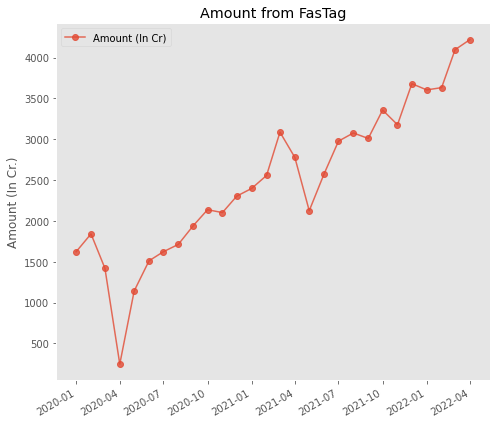

In [38]:
fastag['Amount (In Cr)']['2020-01-01':].iloc[0:].plot(kind='line', alpha=0.8, marker='o', figsize=(7,6), x_compat=True)
plt.legend()
plt.xlabel('')
plt.ylabel('Amount (In Cr.)')
plt.grid(visible=False)
plt.title('Amount from FasTag')
plt.tight_layout()

plt.savefig(plot_output_dir+'\\amt fastag 2020.png', dpi=150, bbox_inches='tight')

plt.show()



# Fuel Consumption

In [49]:
fuel = pd.read_excel(excel_path, sheet_name="fuel-cons",index_col=0, parse_dates=True)

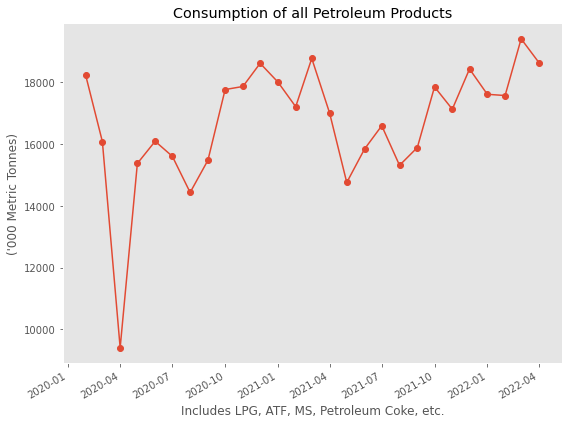

In [50]:
fuel['TOTAL']['2020-01-02':].iloc[0:].plot(marker='o', figsize=(8,6), x_compat=True)
plt.xlabel('Includes LPG, ATF, MS, Petroleum Coke, etc.')
plt.ylabel("('000 Metric Tonnes)")
plt.title('Consumption of all Petroleum Products')
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+'\\petrol_consump', dpi=300, bbox_inches='tight')


# Monthly

In [51]:
monthly = pd.read_excel(excel_path, sheet_name="monthly-indicators",index_col=0, parse_dates=True)

In [52]:
monthly.tail()

,Finished Steel Production,Finished Steel Consumption,Railways: freight traffic,Imports,Exports,Port Volume,Tax Receipts,Central Government Expenditure,Service Receipts,Service Payments
2021-12-01,10073,9408,126780,60309.5,39307.9,62930.0,3870750.0,4464510.0,25306,14891
2022-01-01,10168,10087,129010,53054.1,35150.4,62492.0,1691850.0,2883260.0,21572,13220
2022-02-01,9706,9200,119690,54977.6,33790.1,58550.0,1766130.0,3344910.0,21250,12954
2022-03-01,10744,9848,139240,59090.1,40391.7,69508.0,NaN,NaN,26882,15328
2022-04-01,9350,9049,122200,58264.7,38193.1,NaN,NaN,NaN,27600,15570


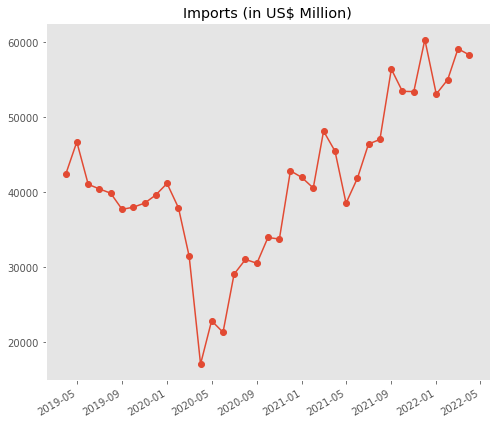

In [42]:
monthly['Imports'].iloc[:].plot(marker='o', figsize=(7,6), x_compat=True)
# plt.ylabel('YoY Change in %')
plt.title('Imports (in US$ Million)')
plt.grid(visible=False)
plt.tight_layout()

plt.savefig(plot_output_dir+'\\imports.png', dpi=300, bbox_inches='tight')




C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_16480\4034041694.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


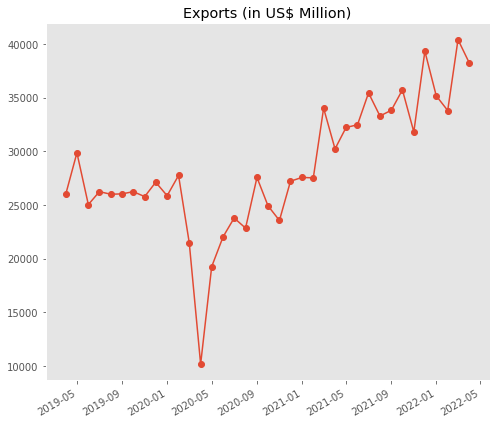

In [43]:
monthly['Exports'].plot(marker='o', figsize=(7,6), x_compat=True)
# plt.ylabel('YoY Change in %')
plt.title('Exports (in US$ Million)')
plt.grid(b=False)
plt.tight_layout()

plt.savefig(plot_output_dir+'\\exports.png', dpi=300, bbox_inches='tight')

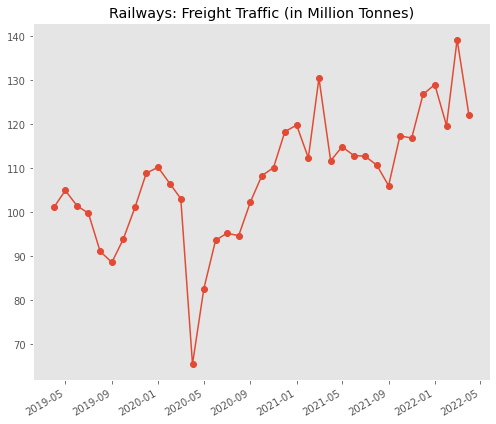

In [44]:

(monthly['Railways: freight traffic']/1000).plot(marker='o', figsize=(7,6), x_compat=True)
# plt.ylabel('YoY Change in %')
plt.title('Railways: Freight Traffic (in Million Tonnes)')
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+'\\rail.png', dpi=300, bbox_inches='tight')


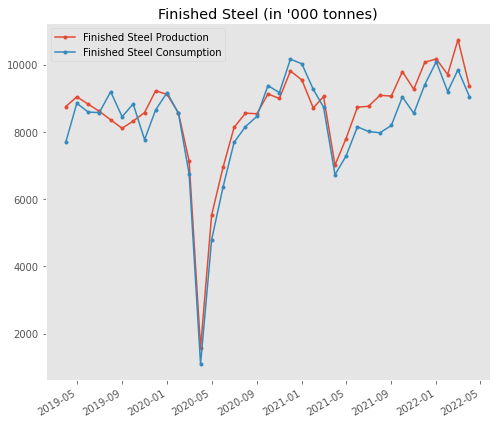

In [45]:
monthly.iloc[:,[0,1]].plot(marker='.', figsize=(7,6), x_compat=True)
# plt.ylabel('YoY Change in %')
plt.title("Finished Steel (in '000 tonnes)")
plt.grid(visible=False)
# plt.legend()
plt.tight_layout()
plt.savefig(plot_output_dir+'\\steel.png', dpi=300, bbox_inches='tight')




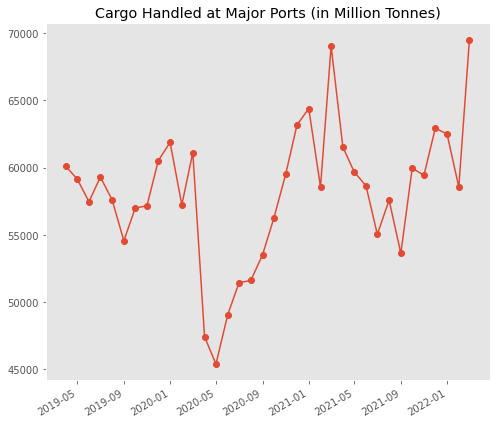

In [46]:

monthly['Port Volume'].iloc[:].plot(marker='o', figsize=(7,6), x_compat=True)
# plt.ylabel('YoY Change in %')
plt.title('Cargo Handled at Major Ports (in Million Tonnes)')
plt.grid(visible=False)
# plt.legend()
plt.tight_layout()
plt.savefig(plot_output_dir+'\\cargo.png', dpi=300, bbox_inches='tight')



In [47]:
monthly['Port Volume']

2019-04-01    60087.0
2019-05-01    59151.0
2019-06-01    57459.0
2019-07-01    59300.0
2019-08-01    57603.0
2019-09-01    54567.0
2019-10-01    56978.0
2019-11-01    57172.0
2019-12-01    60520.0
2020-01-01    61872.0
2020-02-01    57233.0
2020-03-01    61120.0
2020-04-01    47432.0
2020-05-01    45398.0
2020-06-01    49052.0
2020-07-01    51454.0
2020-08-01    51611.0
2020-09-01    53511.0
2020-10-01    56258.0
2020-11-01    59491.0
2020-12-01    63175.0
2021-01-01    64383.0
2021-02-01    58566.0
2021-03-01    69030.0
2021-04-01    61528.0
2021-05-01    59675.0
2021-06-01    58646.0
2021-07-01    55038.0
2021-08-01    57589.0
2021-09-01    53628.0
2021-10-01    59956.0
2021-11-01    59428.0
2021-12-01    62930.0
2022-01-01    62492.0
2022-02-01    58550.0
2022-03-01    69508.0
2022-04-01        NaN
Name: Port Volume, dtype: float64

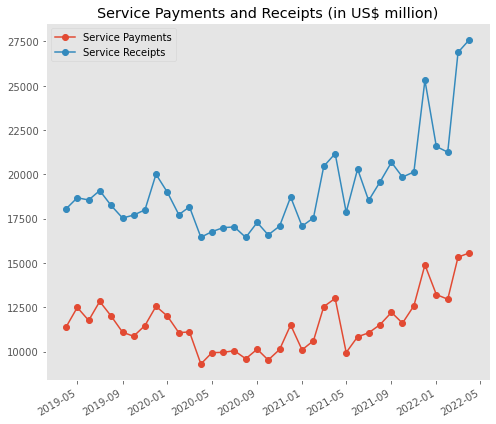

In [53]:
monthly[['Service Payments', 'Service Receipts']].iloc[:].plot(marker='o', figsize=(7,6), x_compat=True)

plt.title('Service Payments and Receipts (in US$ million)')
plt.grid(visible=False)
# plt.legend()
plt.tight_layout()
plt.savefig(plot_output_dir+'\\service.png', dpi=300, bbox_inches='tight')




In [54]:
monthly.tail()

,Finished Steel Production,Finished Steel Consumption,Railways: freight traffic,Imports,Exports,Port Volume,Tax Receipts,Central Government Expenditure,Service Receipts,Service Payments
2021-12-01,10073,9408,126780,60309.5,39307.9,62930.0,3870750.0,4464510.0,25306,14891
2022-01-01,10168,10087,129010,53054.1,35150.4,62492.0,1691850.0,2883260.0,21572,13220
2022-02-01,9706,9200,119690,54977.6,33790.1,58550.0,1766130.0,3344910.0,21250,12954
2022-03-01,10744,9848,139240,59090.1,40391.7,69508.0,NaN,NaN,26882,15328
2022-04-01,9350,9049,122200,58264.7,38193.1,NaN,NaN,NaN,27600,15570


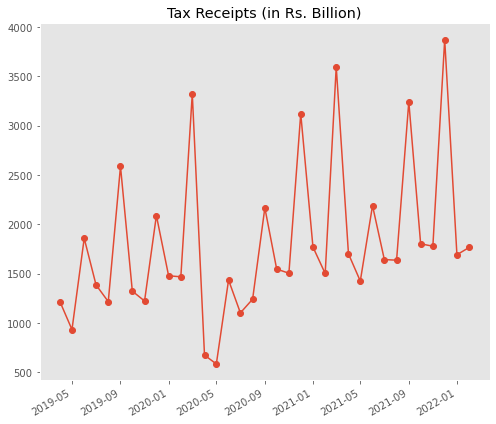

In [55]:
(monthly['Tax Receipts']/1000).iloc[:].plot(marker='o', figsize=(7,6), x_compat=True)

# plt.ylabel('YoY Change (in %)')
plt.title('Tax Receipts (in Rs. Billion)')
plt.grid(visible=False)
# plt.legend()
plt.tight_layout()
plt.savefig(plot_output_dir+'\\taxreceipt.png', dpi=300, bbox_inches='tight')




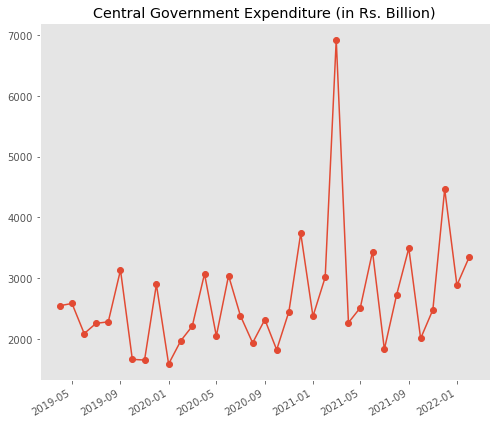

In [56]:
(monthly['Central Government Expenditure']/1000).iloc[:].plot(marker='o', figsize=(7,6), x_compat=True)

# plt.ylabel('YoY Change (in %)')
plt.title('Central Government Expenditure (in Rs. Billion)')
plt.grid(visible=False)
# plt.legend()
plt.tight_layout()
plt.savefig(plot_output_dir+'\\govtexpenditure.png', dpi=300, bbox_inches='tight')




# Money

In [57]:
money = pd.read_excel(excel_path, sheet_name="money",index_col=0, parse_dates=True)

In [58]:
money

,M3,public
Date,,
2019-09-13,10.08,12.73
2019-09-27,9.65,13.36
2019-10-11,10.01,13.54
2019-10-25,10.60,15.29
2019-11-08,9.93,12.24
...,...,...
2022-03-11,8.95,9.40
2022-03-25,8.70,10.19
2022-04-08,9.68,10.41


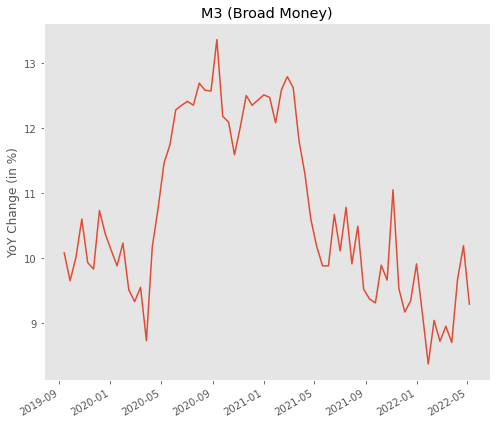

In [59]:
money['M3'].plot(figsize=(7,6), x_compat=True)
plt.xlabel('')
plt.ylabel('YoY Change (in %)')
plt.grid(visible=False)
plt.title('M3 (Broad Money)')
plt.tight_layout()
plt.savefig(plot_output_dir+'\\m3.png', dpi=150, bbox_inches='tight')

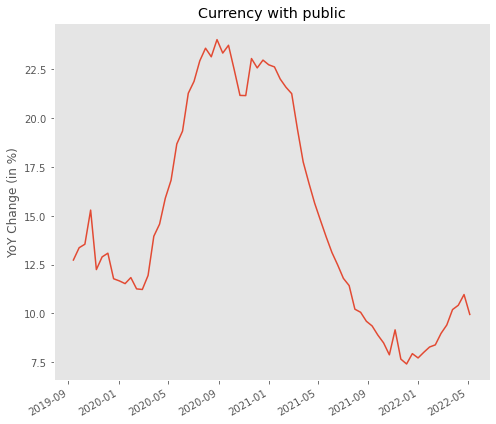

In [60]:
money['public'].plot(figsize=(7,6), x_compat=True)

plt.xlabel('')
plt.ylabel('YoY Change (in %)')
plt.grid(visible=False)
plt.title('Currency with public')
plt.tight_layout()
plt.savefig(plot_output_dir+'\\public_currency.png', dpi=300, bbox_inches='tight')



# Forex

In [64]:
forex = pd.read_excel(excel_path, sheet_name="forex", index_col=0, parse_dates=True)

In [65]:
forex.tail()

,Forex Reserves
Date,
2022-04-15,44430240.0
2022-04-22,44367060.0
2022-04-29,45682950.0
2022-05-06,45823340.0
2022-05-13,45963850.0


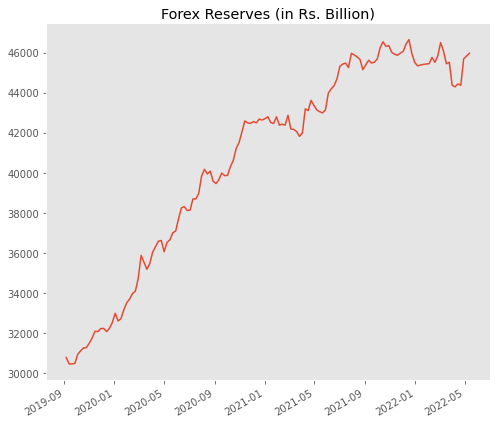

In [66]:
(forex/1000)['Forex Reserves'].plot(figsize=(7,6), x_compat=True)
# plt.ylabel('in Billions of Rs.')
plt.title('Forex Reserves (in Rs. Billion)')
plt.xlabel("")
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+'\\forex.png', dpi=300, bbox_inches='tight')



In [67]:
bank = pd.read_excel(excel_path, sheet_name='banking', index_col=0, parse_dates=True)

In [68]:
bank

,Deposits,Credit
Date,,
2018-07-06,8.36,12.74
2018-07-20,8.15,12.40
2018-08-03,8.16,12.61
2018-08-17,8.31,12.92
2018-08-31,8.89,13.38
...,...,...
2022-03-11,8.83,8.49
2022-03-25,8.94,8.60
2022-04-08,10.06,10.10


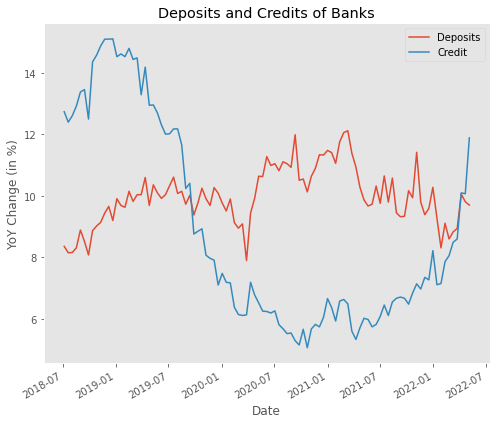

In [69]:
bank.plot(figsize=(7,6), x_compat=True)

plt.ylabel('YoY Change (in %)')
plt.title('Deposits and Credits of Banks')
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+'\\banks.png', dpi=300, bbox_inches='tight')


# COVID

## Active - MOHFW

In [70]:
active = pd.read_excel(excel_path, sheet_name='covid-active', index_col=0, usecols=[0,1])

In [71]:
active['Active Cases Total']

Name of State / UT
Andaman and Nicobar Islands                    0
Andhra Pradesh                                62
Arunachal Pradesh                              1
Assam                                          4
Bihar                                         43
Chandigarh                                    67
Chhattisgarh                                  36
Dadra and Nagar Haveli and Daman and Diu       0
Delhi                                       2138
Goa                                           89
Gujarat                                      199
Haryana                                     1247
Himachal Pradesh                              71
Jammu and Kashmir                             55
Jharkhand                                     22
Karnataka                                   1655
Kerala                                      3799
Ladakh                                         4
Lakshadweep                                    0
Madhya Pradesh                               262
M

In [72]:
print(active.sum()[0])

14955


In [73]:
active.loc["India"] = active.sum()[0]

In [74]:
active = active.sort_values(by='Active Cases Total', ascending=False)
#active = active/1000
active.head()

,Active Cases Total
Name of State / UT,
India,14955
Kerala,3799
Delhi,2138
Maharashtra,1828
Karnataka,1655


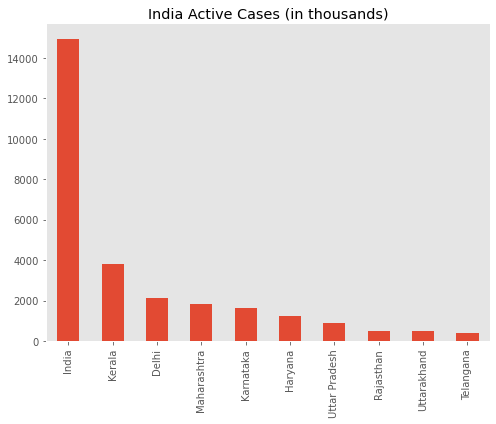

In [75]:
active[:10].plot(kind='bar', figsize=(7,6), legend=False)

plt.xlabel("")
plt.title("India Active Cases (in thousands)")
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+"\\state.png",dpi=300)



# Vaccination - COWIN

In [76]:
vacc = pd.read_excel(excel_path, sheet_name='cowin-state', index_col=0)

In [77]:
vacc['Partially Vaccinated'] = vacc['partial_vaccinated']/vacc['Population']
vacc['Fully Vaccinated'] = vacc['totally_vaccinated']/vacc['Population']
vacc['Vaccinated with precaution dose'] = vacc['Precaution Dose']/vacc['Population']

In [78]:
vacc

,Population,partial_vaccinated,totally_vaccinated,Precaution Dose,Partially Vaccinated,Fully Vaccinated,Vaccinated with precaution dose
State,,,,,,,
A & N Islands,417036,342163,338670,23022,0.820464,0.812088,0.055204
Andhra Pradesh,53903393,44617651,47373632,3023197,0.827734,0.878862,0.056085
Arunachal Pradesh,1570458,908514,760620,32519,0.578503,0.484330,0.020707
Assam,35607039,24159598,20607215,442787,0.678506,0.578740,0.012435
Bihar,124799926,70501629,59324542,1554063,0.564917,0.475357,0.012452
Chandigarh,1158473,1174926,946792,45788,1.014202,0.817276,0.039524
Chhattisgarh,29436231,20644004,18227650,519166,0.701313,0.619225,0.017637
Delhi,18710922,18028856,14996911,1029779,0.963547,0.801506,0.055036
Goa,1586250,1431418,1274065,46421,0.902391,0.803193,0.029265


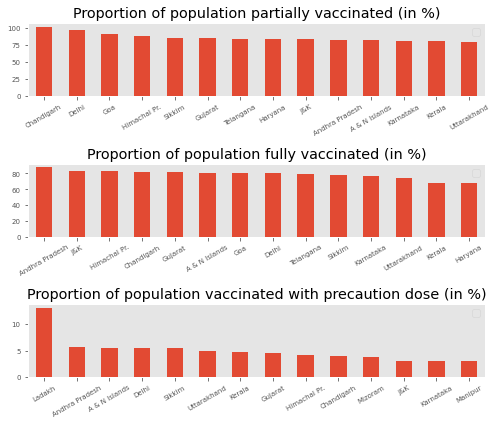

In [80]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7,6))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

ax = ((vacc['Partially Vaccinated'].sort_values(ascending=False).iloc[:14])*100).plot(kind='bar', ax=axes[0], rot=30)
ax.set_title("Proportion of population partially vaccinated (in %)")
plt.tight_layout()
ax.legend("")
ax.grid(False)
ax.tick_params(axis='both', which='major', labelsize=7)
ax.tick_params(axis='both', which='minor', labelsize=7)
# plt.legend(bbox_to_anchor=(1.05,1))
ax.set_xlabel("")


ax2 = ((vacc['Fully Vaccinated'].sort_values(ascending=False).iloc[:14])*100).plot(kind='bar', ax=axes[1], rot=30)
ax2.set_title("Proportion of population fully vaccinated (in %)")
plt.tight_layout()
ax2.legend("")
ax2.grid(False)
ax2.tick_params(axis='both', which='major', labelsize=7)
ax2.tick_params(axis='both', which='minor', labelsize=7)
# plt.legend(bbox_to_anchor=(1.05,1))
ax2.set_xlabel("")

ax3 = ((vacc['Vaccinated with precaution dose'].sort_values(ascending=False).iloc[0:14])*100).plot(kind='bar', ax=axes[2], rot=30)
ax3.set_title("Proportion of population vaccinated with precaution dose (in %)")
plt.tight_layout()
ax3.legend("")
ax3.grid(False)
ax3.tick_params(axis='both', which='major', labelsize=7)
ax3.tick_params(axis='both', which='minor', labelsize=7)
# plt.legend(bbox_to_anchor=(1.05,1))
ax3.set_xlabel("")

plt.tight_layout()

plt.savefig(plot_output_dir+"\\vaccines_india.png", dpi=300)




## age wise PIB

In [81]:
age = pd.read_excel(excel_path, sheet_name="age-pib", index_col=0, usecols=[0,1,2,3])

In [82]:
age = age/10000000

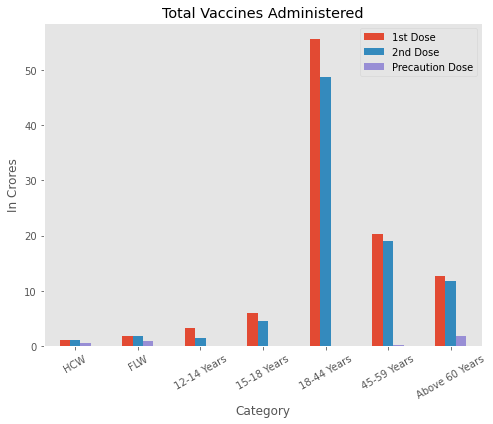

In [83]:
age.plot(kind='bar', rot=0, figsize=(7,6))

# plt.xlabel("\n *45-60 year old with co-morbidities")

plt.ylabel("In Crores")
plt.xticks(rotation=30)
plt.title("Total Vaccines Administered")
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+'\\age_pib.png', dpi=300)
